In [1]:
pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ngkho\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np

image = cv2.imread('lane.jpg')
cv2.imshow('result', image)
cv2.waitKey(0)

-1

In [3]:
image = cv2.imread('lane.jpg')
lane_image = np.copy(image) #creating copy of the image

In [4]:
import cv2
import numpy as np

image = cv2.imread('lane.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY) 

cv2.imshow('result', gray) #to output gray-scale image
cv2.waitKey(0)

-1

In [5]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [6]:
cv2.imshow('result', blur) #to output gaussian image.
cv2.waitKey(0)

-1

In [7]:
cv2.Canny(image, 1, 3)

canny = cv2.Canny(blur, 50, 150) #to obtain edges of the image
cv2.imshow('result', canny)
cv2.waitKey(0)

-1

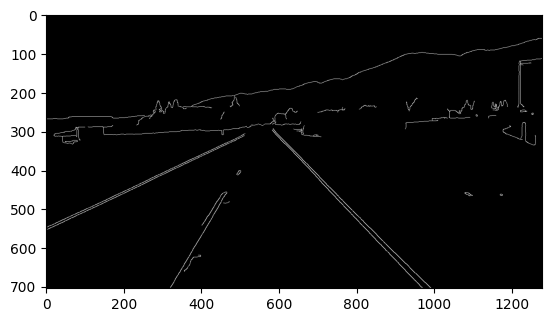

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('lane.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)  # Using the canny function
plt.imshow(canny_image, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    return mask


image = cv2.imread('lane.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
roi_image = region_of_interest(canny_image)

cv2.imshow('result', roi_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    return mask

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
        [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread('lane.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
roi_image = region_of_interest(canny_image)
cropped_image = region_of_interest(canny_image)

cv2.imshow('result', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
import cv2
import numpy as np

# Assuming cropped_image and lane_image are defined
# and lines are detected using HoughLinesP

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image




# Obtain the lines using HoughLinesP
lines = cv2.HoughLinesP(cropped_image, rho=2, theta=np.pi/180, threshold=100, lines=np.array([]), minLineLength=40, maxLineGap=5)

# Display the lines on the original image
line_image = display_lines(lane_image, lines)

# Overlay the lines onto the original image
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)

# Display the result
cv2.imshow('result', combo_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        if len(line) == 1:  # Check if line is a single numpy array
            line = line[0]  # If so, unpack it
        x1, y1, x2, y2 = line  # Unpack the coordinates
        parameters = np.polyfit((x1, x2), (y1, y2), 1)  # Fit line (slope, intercept)
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:  # Negative slope -> left line
            left_fit.append((slope, intercept))
        else:  # Positive slope -> right line
            right_fit.append((slope, intercept))
    
    # Calculate average slope and intercept, with checks
    left_line = None
    right_line = None

    if len(left_fit) > 0:  # Check if there are left lines
        left_fit_average = np.average(left_fit, axis=0)
        left_line = make_coordinates(image, left_fit_average)

    if len(right_fit) > 0:  # Check if there are right lines
        right_fit_average = np.average(right_fit, axis=0)
        right_line = make_coordinates(image, right_fit_average)
    
    # Return only valid lines
    lines_to_return = []
    if left_line is not None:
        lines_to_return.append(left_line)
    if right_line is not None:
        lines_to_return.append(right_line)
    
    return np.array(lines_to_return)



def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1, y1, x2, y2 in lines:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([
    [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

#image = cv2.imread('lane.jpg')
#lane_image = np.copy(image)

#canny_image = canny(lane_image)
#cropped_image = region_of_interest(canny_image)
#lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
#averaged_lines = average_slope_intercept(lane_image, lines)
#line_image = display_lines(lane_image, averaged_lines)

#combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1)

#cv2.imshow('result',combo_image)
#cv2.waitKey(0)

cap = cv2.VideoCapture('testVideo.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:  # Kiểm tra nếu không đọc được khung hình
        print("End of video or cannot read the frame.")
        break

    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average_slope_intercept(frame, lines)
    line_image = display_lines(frame, averaged_lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
    
    cv2.imshow('result', combo_image)
    if cv2.waitKey(1) == ord('q'):  # Thoát nếu nhấn phím 'q'
        break

cap.release()
cv2.destroyAllWindows()